# Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATA/Data DC.xlsx'
data = pd.read_excel(file_path)

data.head()

,Country,Sovereign,Kategori,GDP (USDbn),Real GDP Growth (%),GDP Volatility (10 yr roll (%)),Consumer prices (annual avg. % growth),GG balance (% GDP),GG debt (% GDP),Comm. Dep (%CXR),GG int. exp. (% revenue),GG dom. debt (% GDP),GXD (% GDP),GDP per. cap. (USD),CAB (% GDP)
0,Switzerland,AAA,0,925,1.3,2.0,1.1,0.5,25.0,16.5,0.7,21.9,258.6,102746,5.8
1,Germany,AAA,0,4658,-0.2,2.1,2.5,-2.6,63.6,9.3,2.0,36.7,178.1,54932,5.9
2,Denmark,AAA,0,426,2.3,2.2,1.4,2.3,31.3,15.2,1.3,25.5,161.5,71269,10.5
3,Luxembourg,AAA,0,93,1.0,2.6,2.3,-0.4,23.9,1.0,1.0,6.1,4502.2,137209,13.8
4,Netherlands,AAA,0,1225,0.9,2.7,3.2,-1.6,44.1,19.0,1.6,28.1,350.9,68295,9.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 122 non-null    object 
 1   Sovereign                               122 non-null    object 
 2   Kategori                                122 non-null    int64  
 3   GDP (USDbn)                             122 non-null    int64  
 4   Real GDP Growth (%)                     122 non-null    float64
 5   GDP Volatility (10 yr roll (%))         122 non-null    float64
 6   Consumer prices (annual avg. % growth)  122 non-null    float64
 7   GG balance (% GDP)                      122 non-null    float64
 8   GG debt (% GDP)                         122 non-null    float64
 9   Comm. Dep (%CXR)                        122 non-null    float64
 10  GG int. exp. (% revenue)                122 non-null    float6

In [ ]:
data.isnull().sum()

,0
Country,0
Sovereign,0
Kategori,0
GDP (USDbn),0
Real GDP Growth (%),0
GDP Volatility (10 yr roll (%)),0
Consumer prices (annual avg. % growth),0
GG balance (% GDP),0
GG debt (% GDP),0
Comm. Dep (%CXR),0


In [ ]:
data.describe()

,Kategori,GDP (USDbn),Real GDP Growth (%),GDP Volatility (10 yr roll (%)),Consumer prices (annual avg. % growth),GG balance (% GDP),GG debt (% GDP),Comm. Dep (%CXR),GG int. exp. (% revenue),GG dom. debt (% GDP),GXD (% GDP),GDP per. cap. (USD),CAB (% GDP)
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.491803,874.598361,2.893443,3.946721,6.784426,-2.604918,59.633607,31.277049,10.117213,33.886066,147.757377,25826.377049,0.898443
std,0.501994,3187.335146,2.335983,3.509943,22.403099,3.969884,32.130276,25.339835,10.705754,26.211493,418.085772,27768.441869,7.735103
min,0.000000,2.000000,-2.800000,1.000000,-0.400000,-18.500000,0.000000,0.600000,0.000000,0.000000,3.400000,631.000000,-20.300000
25%,0.000000,43.000000,1.225000,2.300000,1.700000,-4.600000,38.675000,11.650000,3.500000,15.150000,44.400000,4952.500000,-2.675000
50%,0.000000,123.000000,2.800000,3.300000,2.950000,-2.900000,54.650000,18.950000,6.400000,29.150000,70.450000,14263.000000,0.150000
75%,1.000000,488.000000,4.300000,4.400000,4.500000,-0.850000,75.600000,52.600000,13.800000,48.725000,124.250000,37496.250000,4.675000
max,1.000000,29184.000000,9.400000,33.600000,236.800000,11.700000,218.200000,88.300000,65.800000,190.700000,4502.200000,137209.000000,33.800000


In [ ]:
data.dtypes

,0
Country,object
Sovereign,object
Kategori,int64
GDP (USDbn),int64
Real GDP Growth (%),float64
GDP Volatility (10 yr roll (%)),float64
Consumer prices (annual avg. % growth),float64
GG balance (% GDP),float64
GG debt (% GDP),float64
Comm. Dep (%CXR),float64


# Eksplorasi Data

## Cek Korelasi antar Peubah Independen

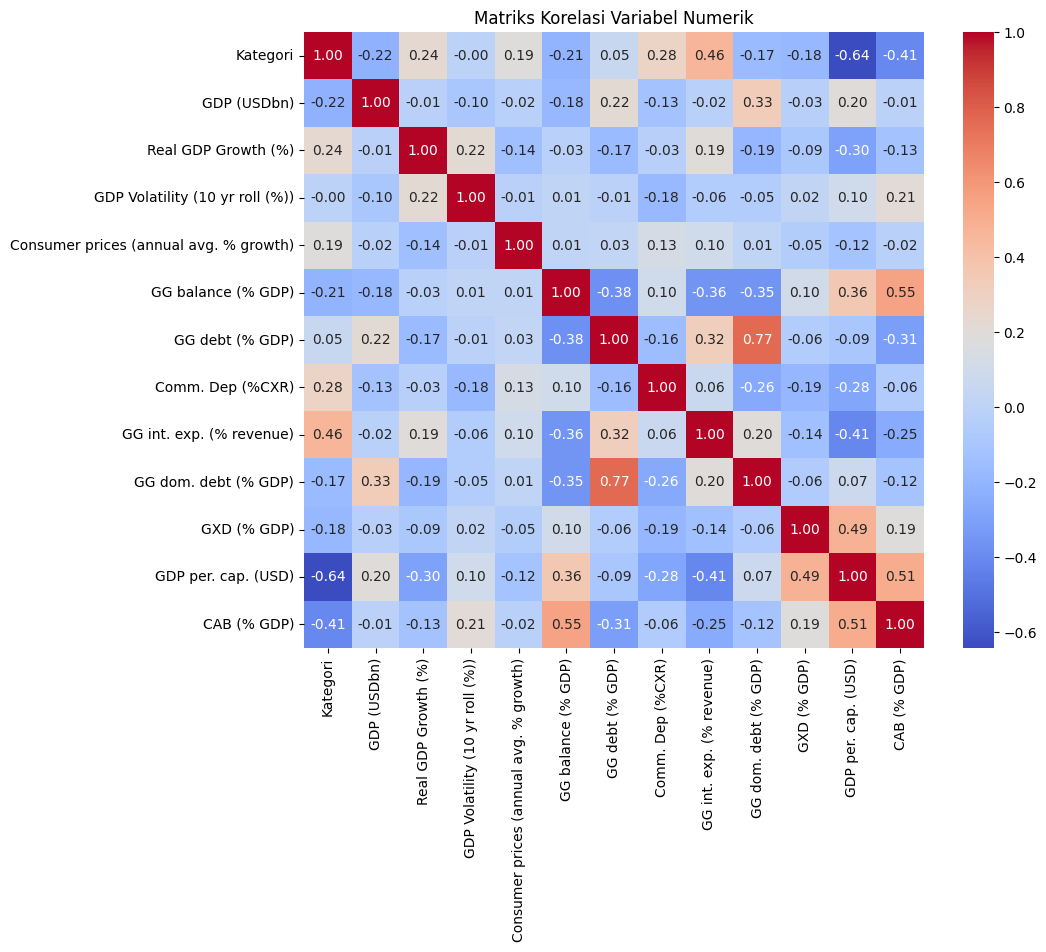

In [ ]:
data.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()


## Eksplorasi Peubah Numerik

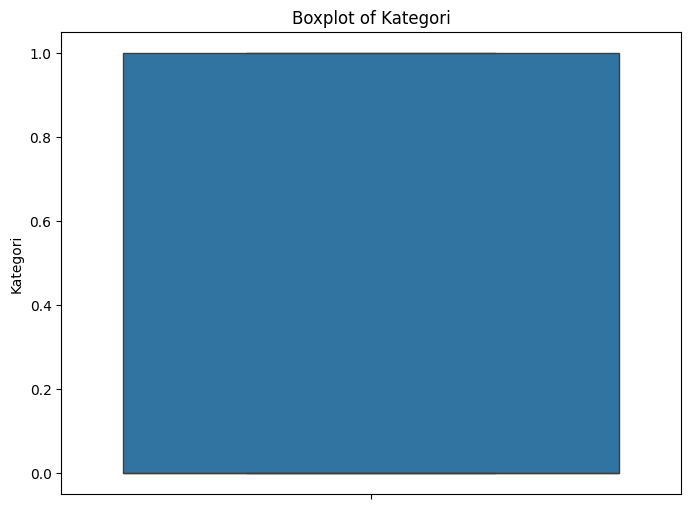

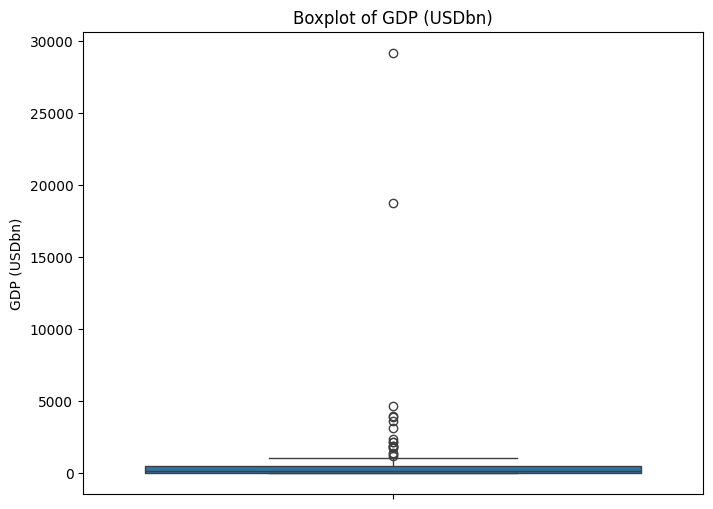

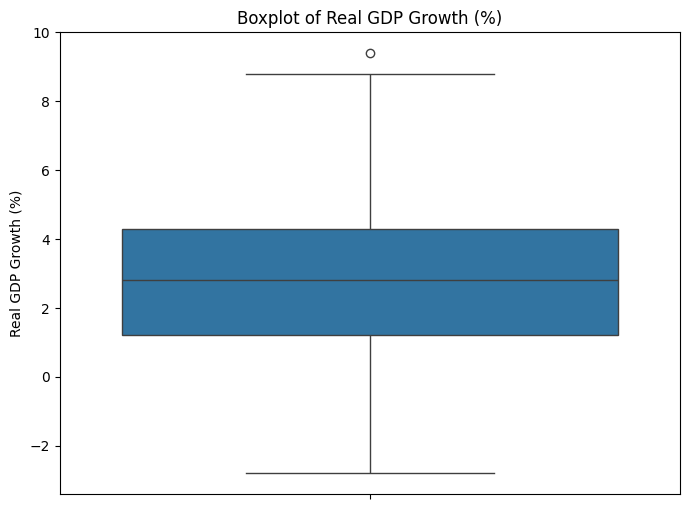

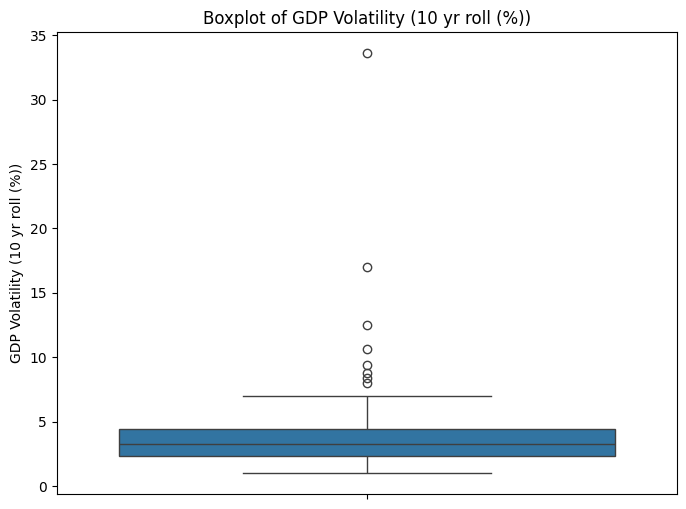

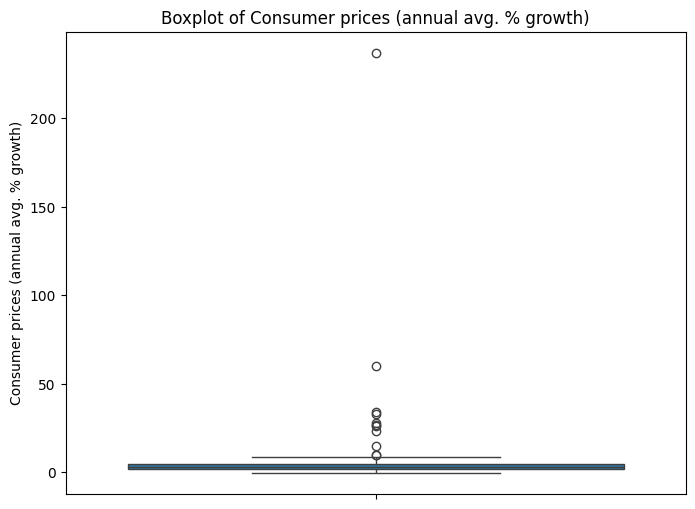

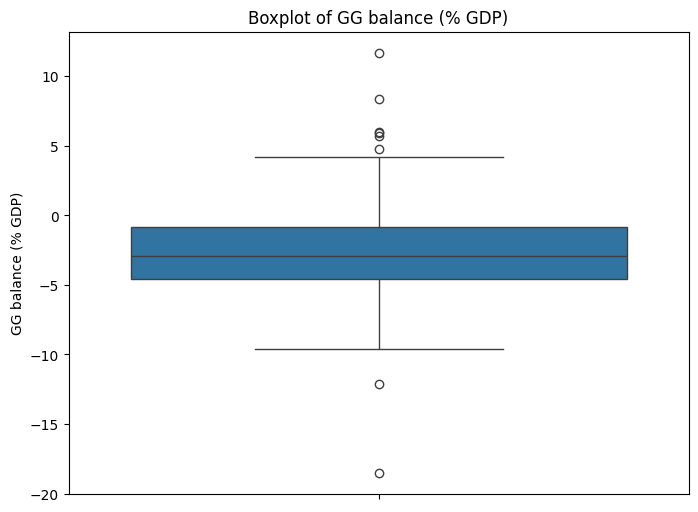

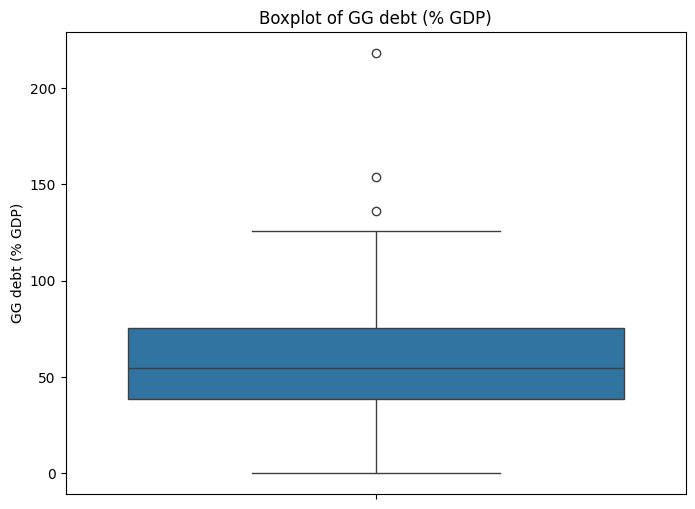

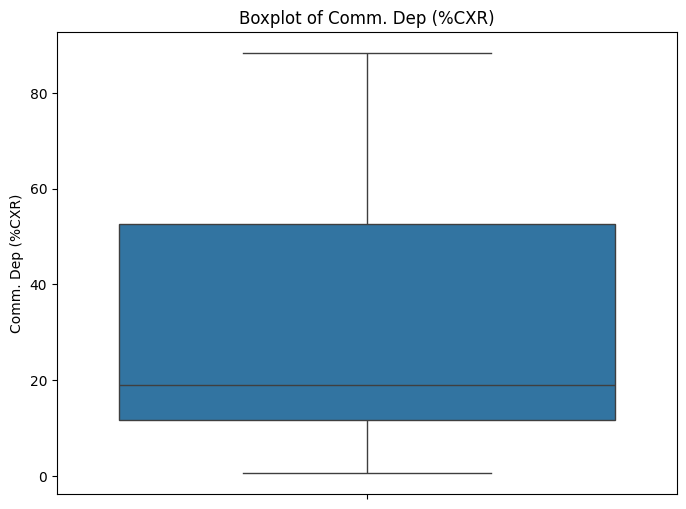

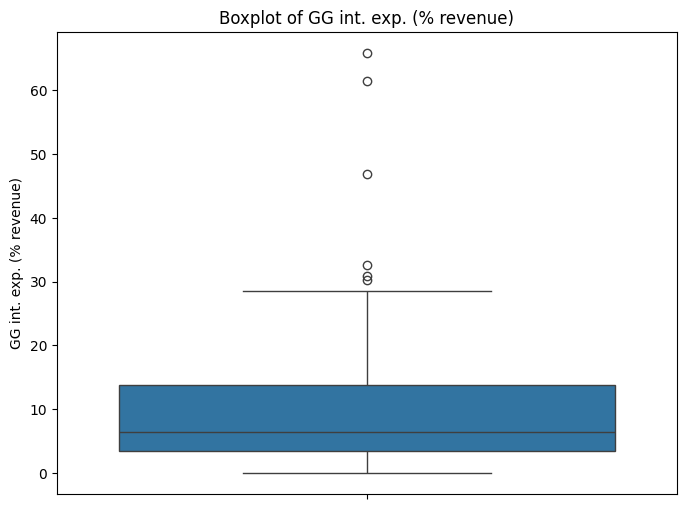

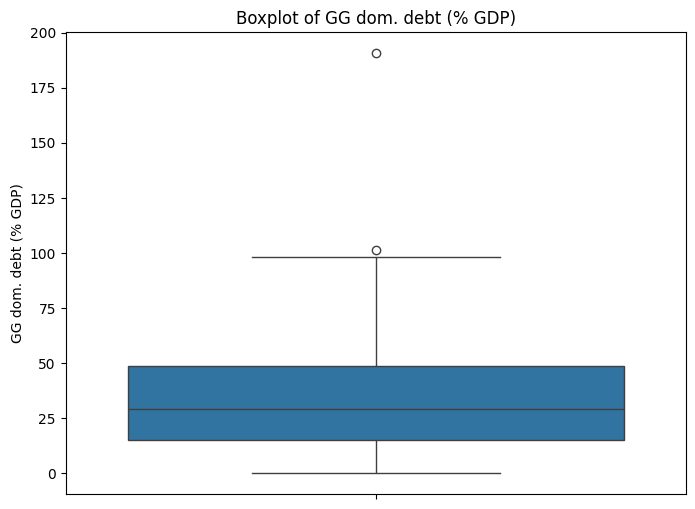

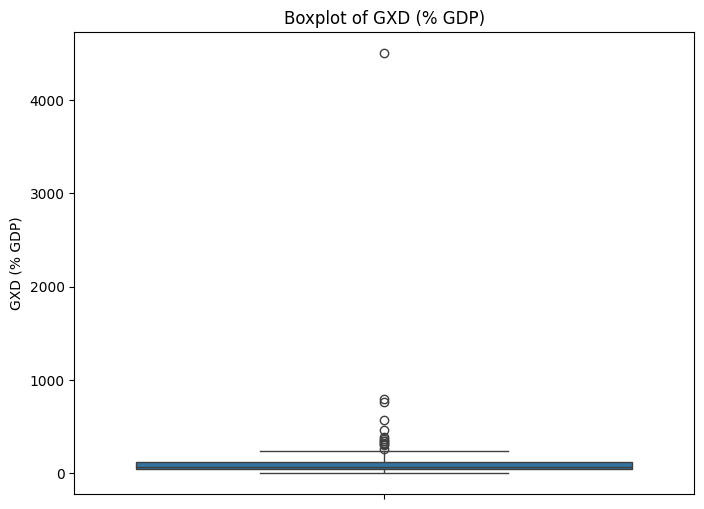

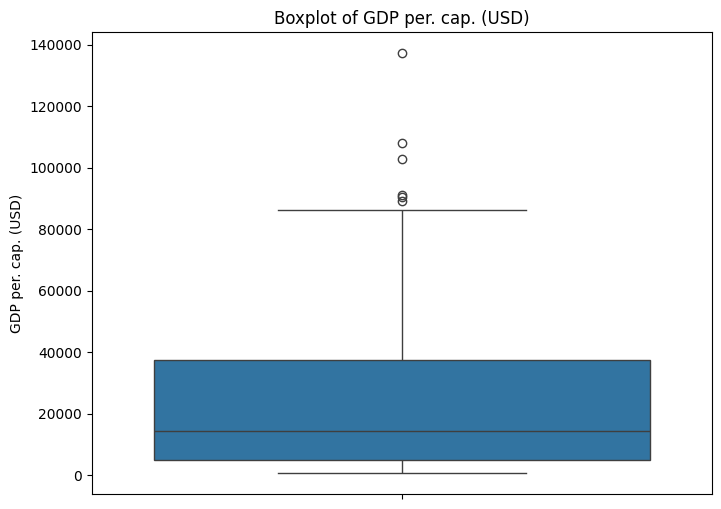

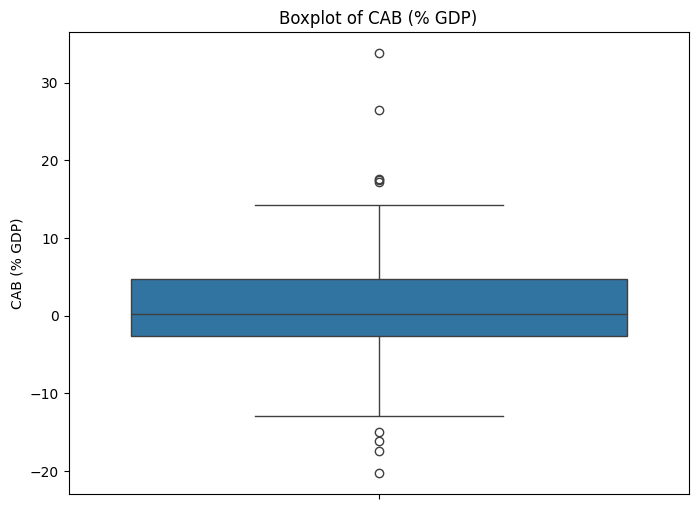

In [ ]:
# prompt: buatkan syntax untuk membuat boxplot dari peubah numerik df, buatkan tampilan boxplotnya vertikal

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame and contains numerical columns you want to plot.
# Replace 'numerical_column' with the actual name of the numerical column you want to visualize.

numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=data[column], orient='v') # vertical boxplot
  plt.title(f'Boxplot of {column}')
  plt.ylabel(column)
  plt.show()


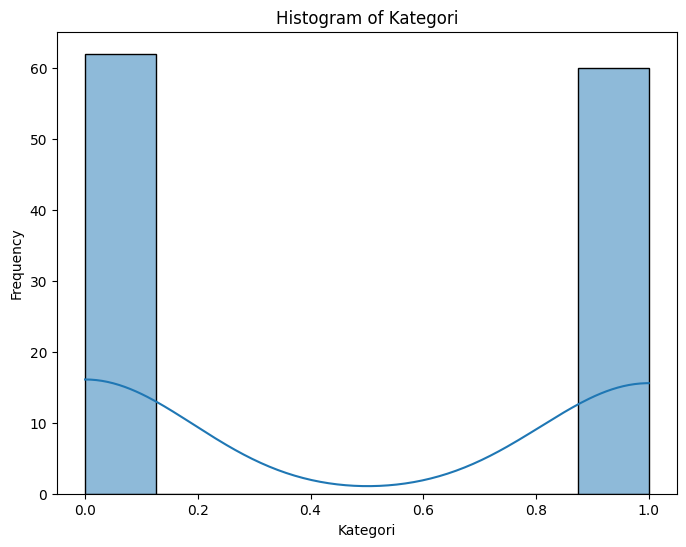

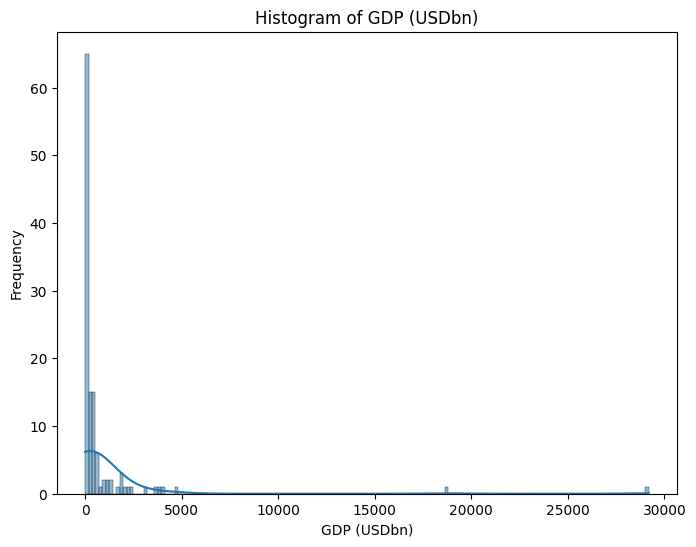

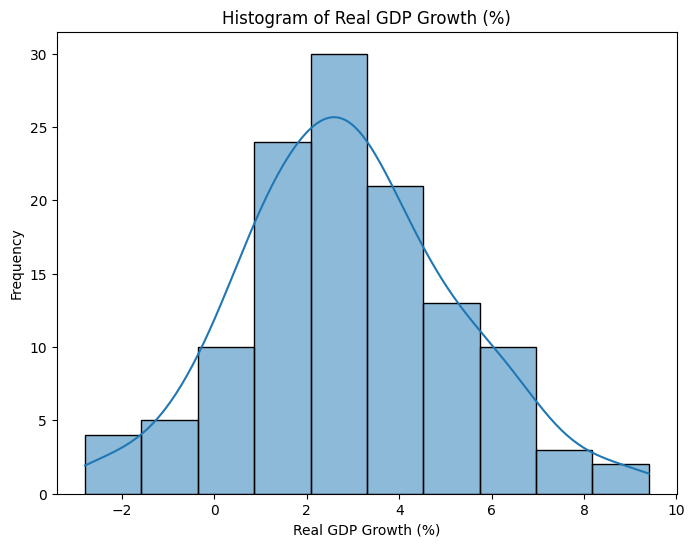

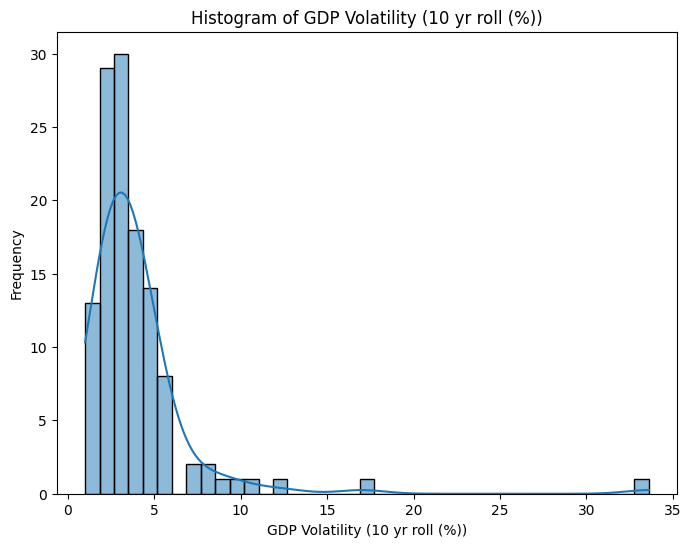

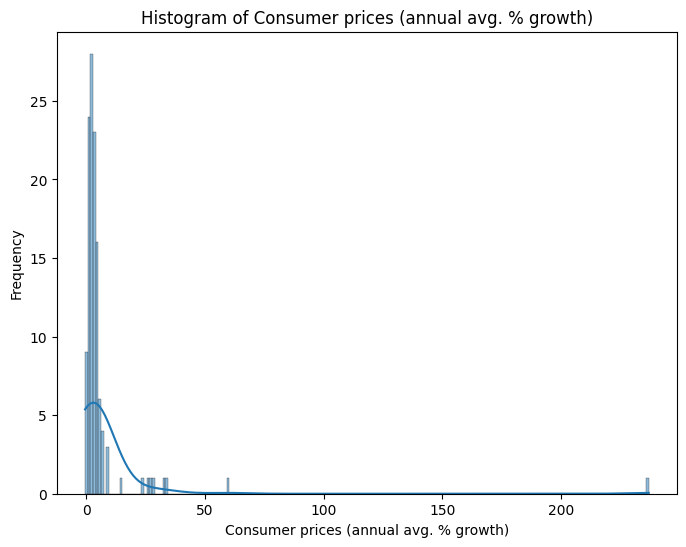

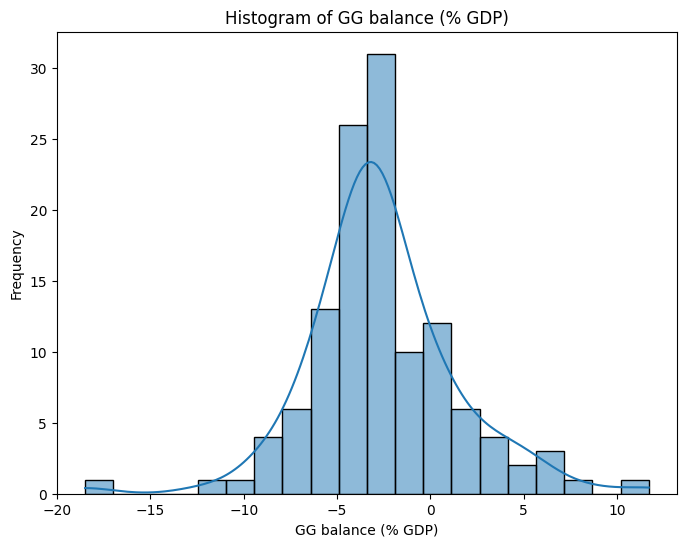

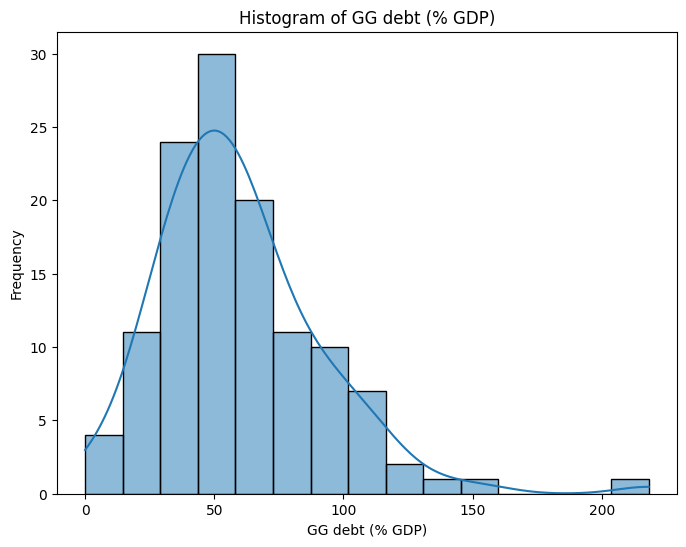

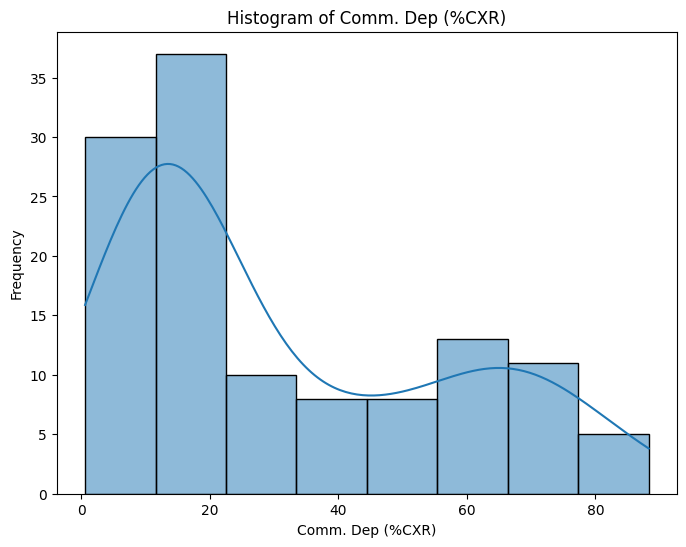

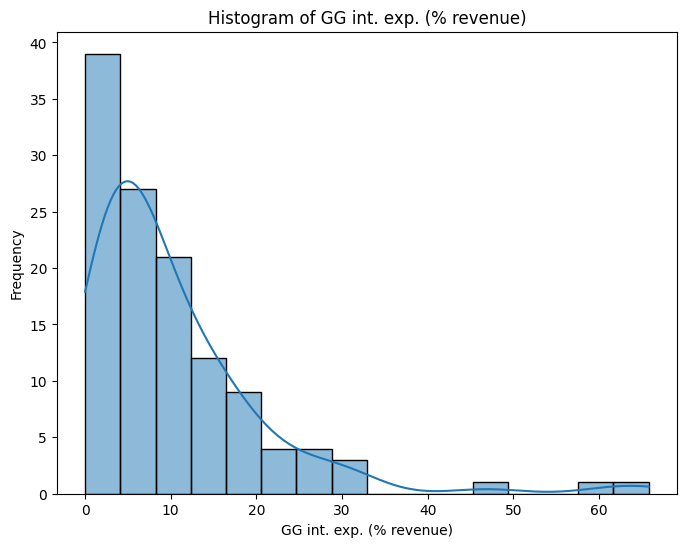

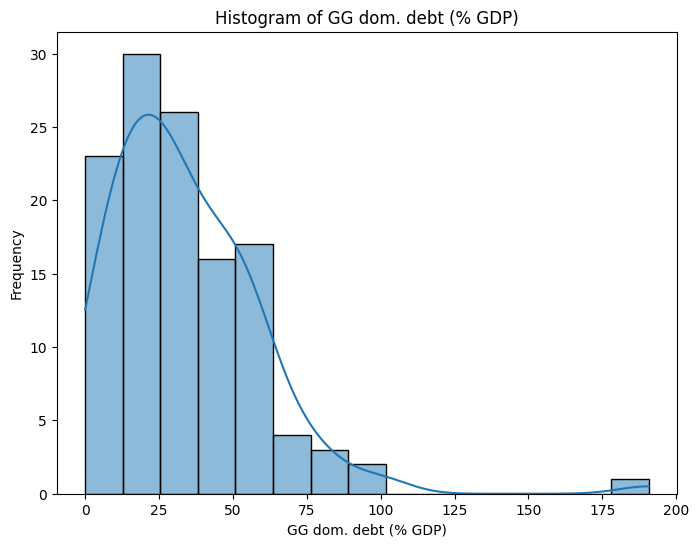

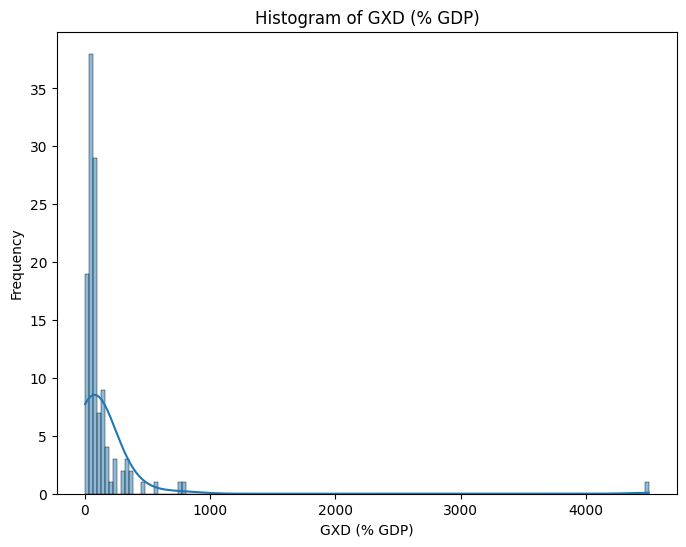

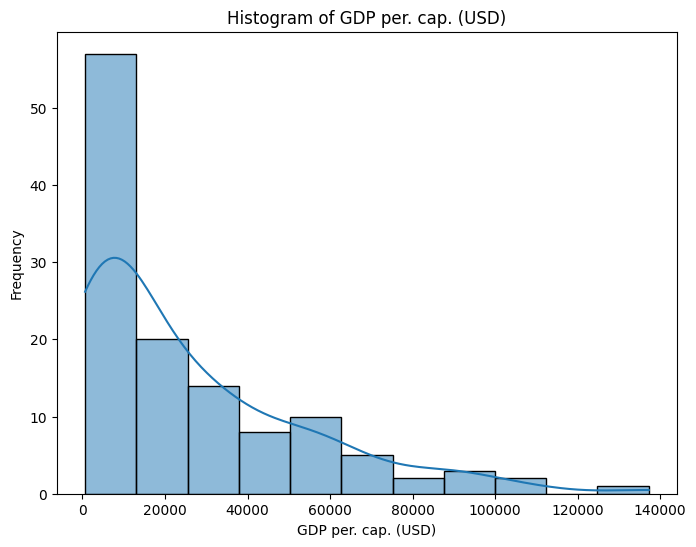

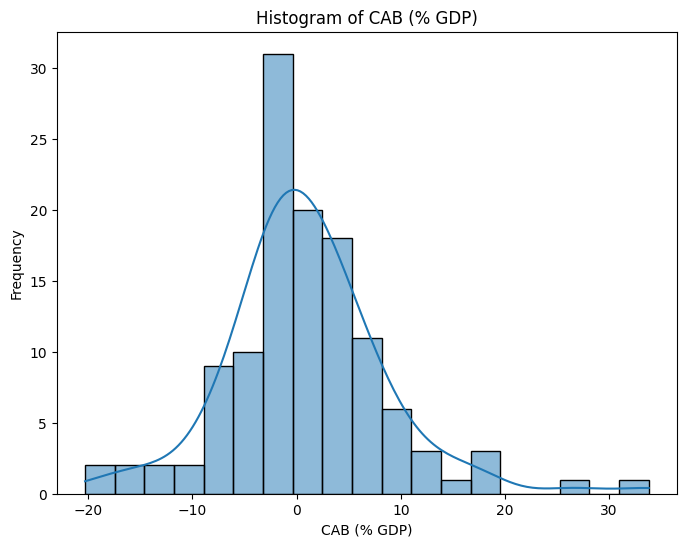

In [ ]:
# prompt: buatkan eksplorasi histogram semua variabel numerik dari df

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains numerical columns you want to plot.
# Replace 'numerical_column' with the actual name of the numerical column you want to visualize.

numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[column], kde=True)  # Histogram with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


## Eksplorasi Sebaran Peubah Kategorik

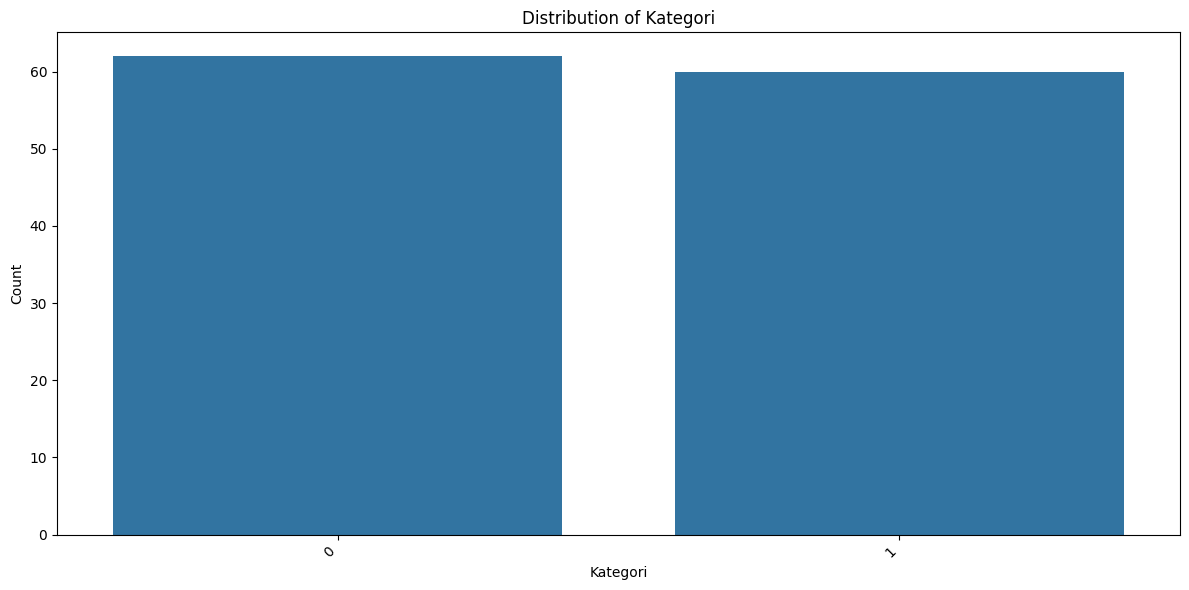

In [ ]:
# prompt: buatkan barchart untuk variabel kategori di df dan ganti nama elemennya dimana angka 1 = Sovereign Elite, 2 =Strong Investment Grade, 3 = Lower Investment Grade, 4 =Non-Investment Grade (Upper Tier), 5  =Distressed and Defaulted

# Assuming 'df' is your DataFrame and contains a categorical column named 'kategori'.
# Replace 'kategori' with the actual name of your categorical column.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Kategori', data=data)
plt.title('Distribution of Kategori')
plt.xlabel('Kategori')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Splitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# prompt: buatkan variabel X dimana isinya selain peubah Country, Sovereign, Kategori

X = data.drop(columns=['Country', 'Sovereign', 'Kategori'])
Y = data['Kategori']

In [ ]:
# prompt: buatkan syntax pembagian data train dan testing dari X dan Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(97, 12)
(25, 12)
(97,)
(25,)


In [ ]:
#normalisasi
scaler = MinMaxScaler()
skalax =scaler.fit(X_train)
X_train_scaled =skalax.transform(X_train)
X_train =pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_Scaled =skalax.transform(X_test)
X_test= pd.DataFrame(X_test_Scaled, columns=X_test.columns)

# Pemodelan XGBoost Tanpa Penanganan

## Tuning Hyperparameter 1

In [ ]:
# Tentukan parameter grid untuk tuning
param_grid = {
    'n_estimators': [25, 50, 100, 200, 300],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 3, 5, 7, 9],
    'objective': ['binary:logistic']
}

## Hyperparameter Tuning 1 dan Grid Search

In [ ]:
xgb_model = XGBClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Lakukan grid search pada data training
grid_search.fit(X_train, Y_train)

# Cetak hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 300, 'objective': 'binary:logistic', 'reg_lambda': 5}
Best score: 0.9278947368421052


## Evaluasi Model Terbaik 1

In [ ]:
# Evaluasi Model Terbaik 1

best_xgb_model = grid_search.best_estimator_

# Prediksi pada data latih
y_train_pred = best_xgb_model.predict(X_train)

# Evaluasi model pada data latih
print("Classification Report (Data Latih):")
print(classification_report(Y_train, y_train_pred))
print("Confusion Matrix (Data Latih):")
print(confusion_matrix(Y_train, y_train_pred))


# Prediksi pada data uji
y_test_pred = best_xgb_model.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred))
print("Confusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred))

# Akurasi data uji
accuracy = accuracy_score(Y_test, y_test_pred)
print(f"\nAkurasi data uji: {accuracy}")


Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        50

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

Confusion Matrix (Data Latih):
[[47  0]
 [ 0 50]]

Classification Report (Data Uji):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Confusion Matrix (Data Uji):
[[14  1]
 [ 1  9]]

Akurasi data uji: 0.92


## Tuning Hyperparameter 2, Random Search, dan Cross Validation

In [ ]:
# Tentukan parameter dist untuk tuning
param_dist = {
    'n_estimators': [25, 50, 100, 200, 300],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 3, 5],
    'objective': ['binary:logistic']
}

In [ ]:
# Inisialisasi RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV # import the RandomizedSearchCV class

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, objective='binary:logistic'),
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi random search
    scoring='accuracy',
    cv=5,  # 5-fold cross validation
    n_jobs=-1,  # Gunakan semua core processor
    random_state=42  # Untuk reproduksi hasil
)

# Lakukan random search pada data training
random_search.fit(X_train, Y_train)

# Cetak hasil terbaik
print("Best parameters (Random Search):", random_search.best_params_)
print("Best score (Random Search):", random_search.best_score_)

Best parameters (Random Search): {'reg_lambda': 3, 'objective': 'binary:logistic', 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.3}
Best score (Random Search): 0.9173684210526316


## Evaluasi Model Terbaik 2

In [ ]:
# Evaluasi Model Terbaik (Random Search)
best_xgb_model_random = random_search.best_estimator_

# Prediksi pada data latih
y_train_pred_random = best_xgb_model_random.predict(X_train)

# Evaluasi model pada data latih
print("\nClassification Report (Data Latih - Random Search):")
print(classification_report(Y_train, y_train_pred_random))
print("Confusion Matrix (Data Latih - Random Search):")
print(confusion_matrix(Y_train, y_train_pred_random))

# Prediksi pada data uji
y_test_pred_random = best_xgb_model_random.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji - Random Search):")
print(classification_report(Y_test, y_test_pred_random))
print("Confusion Matrix (Data Uji - Random Search):")
print(confusion_matrix(Y_test, y_test_pred_random))

# Akurasi data uji
accuracy_random = accuracy_score(Y_test, y_test_pred_random)
print(f"\nAkurasi data uji (Random Search): {accuracy_random}")



Classification Report (Data Latih - Random Search):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        50

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

Confusion Matrix (Data Latih - Random Search):
[[47  0]
 [ 0 50]]

Classification Report (Data Uji - Random Search):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Confusion Matrix (Data Uji - Random Search):
[[13  2]
 [ 1  9]]

Akurasi data uji (Random Search): 0.88


## Hyperparameter Tuning 3 dan Grid Search

In [ ]:
# Tentukan parameter grid untuk tuning
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05],
    'reg_lambda': [1, 3, 5, 7, 9],
    'objective': ['binary:logistic']
}

In [ ]:
# prompt: definisikan model awal, definisikan gridsearchcv, lakuin grid search dan fitting data training, tampilin parameter terbaik, tampilin skor akurasi terbaik hasil cv, rename jadi xgb_model3

# Inisialisasi GridSearchCV
xgb_model3 = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model3, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Lakukan grid search pada data training
grid_search.fit(X_train, Y_train)

# Cetak parameter terbaik
print("Best parameters:", grid_search.best_params_)

# Cetak skor akurasi terbaik hasil CV
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'objective': 'binary:logistic', 'reg_lambda': 1}
Best cross-validation score: 0.906842105263158


## Evaluasi Model Terbaik 3

In [ ]:
# Evaluasi Model Terbaik 3

best_xgb_model3 = grid_search.best_estimator_

# Prediksi pada data latih
y_train_pred3 = best_xgb_model3.predict(X_train)

# Evaluasi model pada data latih
print("\nClassification Report (Data Latih - Model 3):")
print(classification_report(Y_train, y_train_pred3))
print("Confusion Matrix (Data Latih - Model 3):")
print(confusion_matrix(Y_train, y_train_pred3))


Classification Report (Data Latih - Model 3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        50

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

Confusion Matrix (Data Latih - Model 3):
[[47  0]
 [ 0 50]]


In [ ]:
# Prediksi pada data uji
y_test_pred3 = best_xgb_model3.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji - Model 3):")
print(classification_report(Y_test, y_test_pred3))
print("Confusion Matrix (Data Uji - Model 3):")
print(confusion_matrix(Y_test, y_test_pred3))

# Akurasi data uji
accuracy3 = accuracy_score(Y_test, y_test_pred3)
print(f"\nAkurasi data uji (Model 3): {accuracy3}")

#bandingkan akurasi ketiga model
print(f"Akurasi Model 1: {accuracy}")
print(f"Akurasi Model 2 (Random Search): {accuracy_random}")
print(f"Akurasi Model 3: {accuracy3}")



Classification Report (Data Uji - Model 3):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Confusion Matrix (Data Uji - Model 3):
[[13  2]
 [ 1  9]]

Akurasi data uji (Model 3): 0.88
Akurasi Model 1: 0.92
Akurasi Model 2 (Random Search): 0.88
Akurasi Model 3: 0.88


## Tuning Hyperparameter 4 dan Grid Search

In [ ]:
## Tuning Hyperparameter 4 dan Grid Search
param_grid4 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'objective': ['binary:logistic']
}

xgb_model4 = XGBClassifier(random_state=42)
grid_search4 = GridSearchCV(estimator=xgb_model4, param_grid=param_grid4, scoring='accuracy', cv=5, n_jobs=-1)
grid_search4.fit(X_train, Y_train)

print("Best parameters (Model 4):", grid_search4.best_params_)
print("Best cross-validation score (Model 4):", grid_search4.best_score_)

best_xgb_model4 = grid_search4.best_estimator_

y_train_pred4 = best_xgb_model4.predict(X_train)
print("\nClassification Report (Data Latih - Model 4):")
print(classification_report(Y_train, y_train_pred4))
print("Confusion Matrix (Data Latih - Model 4):")
print(confusion_matrix(Y_train, y_train_pred4))

y_test_pred4 = best_xgb_model4.predict(X_test)
print("\nClassification Report (Data Uji - Model 4):")
print(classification_report(Y_test, y_test_pred4))
print("Confusion Matrix (Data Uji - Model 4):")
print(confusion_matrix(Y_test, y_test_pred4))

accuracy4 = accuracy_score(Y_test, y_test_pred4)
print(f"\nAkurasi data uji (Model 4): {accuracy4}")


Best parameters (Model 4): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 1.0}
Best cross-validation score (Model 4): 0.9173684210526316

Classification Report (Data Latih - Model 4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        50

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

Confusion Matrix (Data Latih - Model 4):
[[47  0]
 [ 0 50]]

Classification Report (Data Uji - Model 4):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

## Tuning Hyperparameter 5 dan Grid Search

In [ ]:
# Tentukan parameter grid untuk tuning
param_grid = {
       'n_estimators': [50, 100, 150],
       'max_depth': [1, 2, 3],
       'learning_rate': [0.001, 0.005, 0.01],
       'reg_lambda': [50, 100, 200, 500],  # Significantly increased
       'reg_alpha': [0.5, 1, 2, 5],    # Increased and wider range
       'objective': ['binary:logistic']
   }

In [ ]:
xgb_model5 = XGBClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model5, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Lakukan grid search pada data training
grid_search.fit(X_train, Y_train)

# Cetak hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150, 'objective': 'binary:logistic', 'reg_alpha': 1, 'reg_lambda': 200}
Best score: 0.8652631578947367


In [ ]:
# Evaluasi Model Terbaik 5

best_xgb_model5 = grid_search.best_estimator_

# Prediksi pada data latih
y_train_pred = best_xgb_model5.predict(X_train)

# Evaluasi model pada data latih
print("Classification Report (Data Latih):")
print(classification_report(Y_train, y_train_pred))
print("Confusion Matrix (Data Latih):")
print(confusion_matrix(Y_train, y_train_pred))


# Prediksi pada data uji
y_test_pred = best_xgb_model5.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred))
print("Confusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred))

# Akurasi data uji
accuracy = accuracy_score(Y_test, y_test_pred)
print(f"\nAkurasi data uji: {accuracy}")


Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.85      0.94      0.90        50

    accuracy                           0.89        97
   macro avg       0.89      0.88      0.89        97
weighted avg       0.89      0.89      0.89        97

Confusion Matrix (Data Latih):
[[39  8]
 [ 3 47]]

Classification Report (Data Uji):
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.71      1.00      0.83        10

    accuracy                           0.84        25
   macro avg       0.86      0.87      0.84        25
weighted avg       0.89      0.84      0.84        25

Confusion Matrix (Data Uji):
[[11  4]
 [ 0 10]]

Akurasi data uji: 0.84


## Tuning Hyperparameter 6 dan Grid Search

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Explore a wider range of estimators
    'max_depth': [3, 4, 5],          # Slightly deeper trees
    'learning_rate': [0.01, 0.05, 0.1],  # Moderate learning rates
    'subsample': [0.8, 0.9, 1.0],     # Introduce subsampling
    'colsample_bytree': [0.8, 0.9, 1.0], # Introduce column subsampling
    'reg_alpha': [0.1, 1, 10],       # Explore L1 regularization
    'reg_lambda': [100, 200, 500, 1000],       # Explore L2 regularization
    'objective': ['binary:logistic']
}

In [ ]:
xgb_model6 = XGBClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model6, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Lakukan grid search pada data training
grid_search.fit(X_train, Y_train)

# Cetak hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'objective': 'binary:logistic', 'reg_alpha': 0.1, 'reg_lambda': 100, 'subsample': 1.0}
Best score: 0.8963157894736842


In [ ]:
# Evaluasi Model Terbaik 6

best_xgb_model6 = grid_search.best_estimator_

# Prediksi pada data latih
y_train_pred = best_xgb_model6.predict(X_train)

# Evaluasi model pada data latih
print("Classification Report (Data Latih):")
print(classification_report(Y_train, y_train_pred))
print("Confusion Matrix (Data Latih):")
print(confusion_matrix(Y_train, y_train_pred))


# Prediksi pada data uji
y_test_pred = best_xgb_model6.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred))
print("Confusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred))

# Akurasi data uji
accuracy = accuracy_score(Y_test, y_test_pred)
print(f"\nAkurasi data uji: {accuracy}")


Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.94      0.98      0.96        50

    accuracy                           0.96        97
   macro avg       0.96      0.96      0.96        97
weighted avg       0.96      0.96      0.96        97

Confusion Matrix (Data Latih):
[[44  3]
 [ 1 49]]

Classification Report (Data Uji):
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

Confusion Matrix (Data Uji):
[[12  3]
 [ 1  9]]

Akurasi data uji: 0.84


## Hyperparameter Tuning 7 dan Grid Search

In [ ]:
param_grid = {
    'n_estimators': [50],  # Explore a wider range of estimators
    'max_depth': [3,5,7],          # Slightly deeper trees
    'learning_rate': [0.01,0.1],  # Moderate learning rates
    'subsample': [0.7,0.8],     # Introduce subsampling
    'colsample_bytree': [ 0.8], # Introduce column subsampling
    'min_child_weight': [3],
    'reg_lambda': [10],  # Moderate values
       'reg_alpha': [0.5],    # Moderate values
       'objective': ['binary:logistic']
}

In [ ]:
xgb_model7 = XGBClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model7, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Lakukan grid search pada data training
grid_search.fit(X_train, Y_train)

# Cetak hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'objective': 'binary:logistic', 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.7}
Best score: 0.8547368421052631


In [ ]:
# Evaluasi Model Terbaik 7

best_xgb_model7 = grid_search.best_estimator_

# Prediksi pada data latih
y_train_pred = best_xgb_model7.predict(X_train)

# Evaluasi model pada data latih
print("Classification Report (Data Latih):")
print(classification_report(Y_train, y_train_pred))
print("Confusion Matrix (Data Latih):")
print(confusion_matrix(Y_train, y_train_pred))


# Prediksi pada data uji
y_test_pred = best_xgb_model7.predict(X_test)

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred))
print("Confusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred))

# Akurasi data uji
accuracy = accuracy_score(Y_test, y_test_pred)
print(f"\nAkurasi data uji: {accuracy}")


Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        47
           1       0.87      0.94      0.90        50

    accuracy                           0.90        97
   macro avg       0.90      0.90      0.90        97
weighted avg       0.90      0.90      0.90        97

Confusion Matrix (Data Latih):
[[40  7]
 [ 3 47]]

Classification Report (Data Uji):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25

Confusion Matrix (Data Uji):
[[12  3]
 [ 0 10]]

Akurasi data uji: 0.88


# Perbandingan Model

In [ ]:
print(f"Akurasi Model 1: {accuracy}")
print(f"Akurasi Model 2 (Random Search): {accuracy_random}")
print(f"Akurasi Model 3: {accuracy3}")
print(f"Akurasi Model 4: {accuracy4}")

Akurasi Model 1: 0.88
Akurasi Model 2 (Random Search): 0.88
Akurasi Model 3: 0.88
Akurasi Model 4: 0.88


# Feature Important Global


Model Terbaik: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Akurasi Terbaik: 0.88

Feature Importance:
                                   Feature  Importance
10                     GDP per. cap. (USD)    0.497902
0                              GDP (USDbn)    0.153383
3   Consumer prices (annu

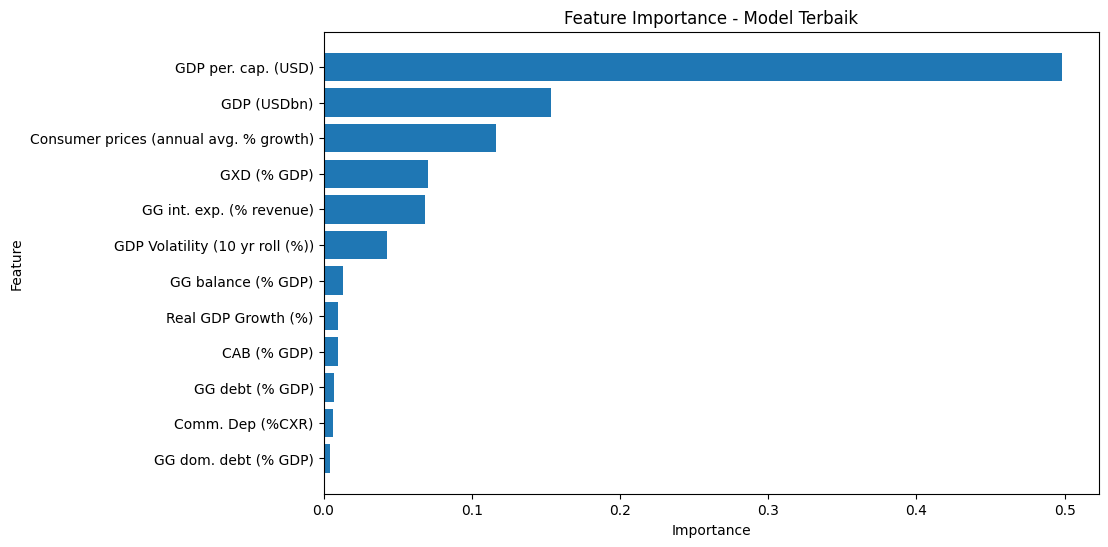

In [ ]:
# Menentukan Model Terbaik
best_model = None
best_accuracy = 0

if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = best_xgb_model
if accuracy_random > best_accuracy:
    best_accuracy = accuracy_random
    best_model = best_xgb_model_random
if accuracy3 > best_accuracy:
    best_accuracy = accuracy3
    best_model = best_xgb_model3
if accuracy4 > best_accuracy:
    best_accuracy = accuracy4
    best_model = best_xgb_model4

print(f"\nModel Terbaik: {best_model}\nAkurasi Terbaik: {best_accuracy}")

# Cek Feature Importance untuk Model Terbaik
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = best_model.feature_importances_  # Menggunakan model terbaik

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Model Terbaik')
plt.gca().invert_yaxis()
plt.show()


Feature Importance (Model 7):
                                   Feature  Importance
10                     GDP per. cap. (USD)    0.376503
7                 GG int. exp. (% revenue)    0.233105
0                              GDP (USDbn)    0.158838
3   Consumer prices (annual avg. % growth)    0.108780
11                             CAB (% GDP)    0.091718
9                              GXD (% GDP)    0.031056
2          GDP Volatility (10 yr roll (%))    0.000000
1                      Real GDP Growth (%)    0.000000
6                         Comm. Dep (%CXR)    0.000000
5                          GG debt (% GDP)    0.000000
4                       GG balance (% GDP)    0.000000
8                     GG dom. debt (% GDP)    0.000000


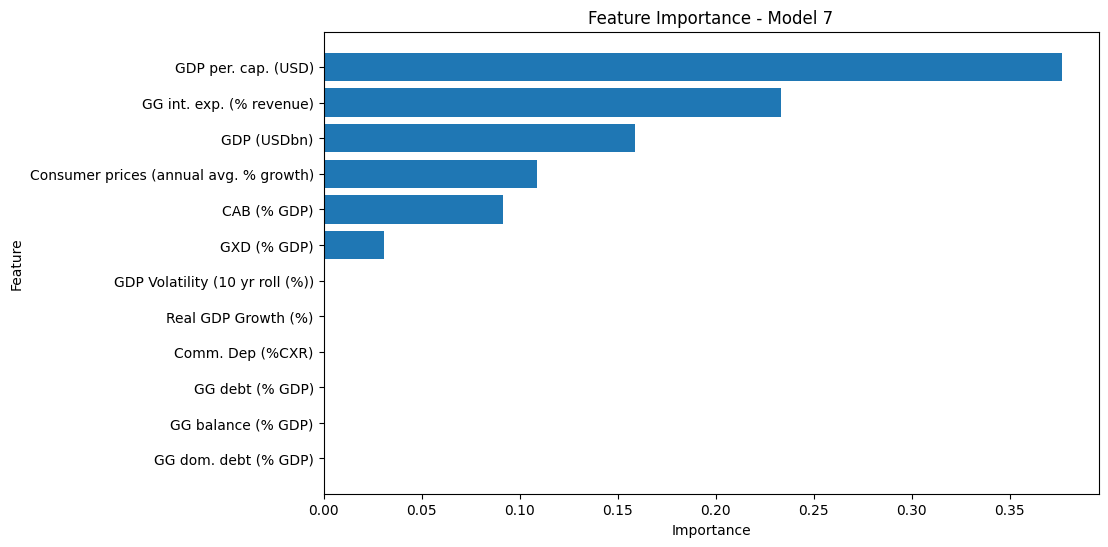

In [ ]:
# prompt: feature important model 7

# ## Feature Important Model 7
# Cek Feature Importance untuk Model 7
feature_importance_model7 = best_xgb_model7.feature_importances_

feature_importance_df_model7 = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_model7})
feature_importance_df_model7 = feature_importance_df_model7.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Model 7):")
print(feature_importance_df_model7)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_model7['Feature'], feature_importance_df_model7['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Model 7')
plt.gca().invert_yaxis()
plt.show()